# Treadmill Exercise Data Analysis

Importing required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Reading data into dataframe

In [2]:
df = pd.read_csv("TreadmillExercise.csv")

Show head of dataframe

In [3]:
df.head()

,Date,Miles,Speed,Steps0,Steps1,TotalSteps,Steps/Mile,Calories,Weight
0,03/28/20,2,3,324,5089.00,4765,2382.25,170,NaN
1,03/28/20,3,2,5289,13786.02,8497,2832.34,255,153.0
2,03/29/20,2,2,257,5845.00,5588,2794.00,170,NaN
3,03/29/20,6,2,6683,23575.00,16892,2815.33,510,150.0
4,03/30/20,3,2,280,8787.00,8507,2835.67,255,NaN


Show shape of dataframe

In [4]:
df.shape

(178, 9)

Getting basic stats on dataframe

In [5]:
df.describe()

,Miles,Speed,Steps0,Steps1,TotalSteps,Steps/Mile,Calories,Weight
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,98.000000
mean,3.735955,2.213483,7997.353933,18754.887753,10757.533708,2867.706404,317.556180,133.285714
std,1.848178,0.509168,9522.145238,10477.729171,5478.720931,390.603735,157.095134,8.103391
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,121.000000
25%,2.250000,2.000000,860.000000,10941.000000,6863.500000,2810.957500,191.250000,126.500000
50%,3.000000,2.000000,4009.000000,16777.000000,9272.500000,2928.540000,255.000000,132.000000
75%,5.000000,2.000000,12785.750000,24731.750000,13986.500000,3066.875000,425.000000,139.000000
max,10.000000,5.000000,55712.000000,71367.000000,31402.000000,3952.500000,850.000000,153.000000


Total miles and steps walked, calories burned, and weight loss since starting

In [6]:
totalMilesWalked = df['Miles'].sum()
totalStepsWalked = df['TotalSteps'].sum()
totalCaloriesBurned = df['Calories'].sum()
totalWeightLoss = df['Weight'].max() - df['Weight'][len(df)-1]

print('Total miles walked: {}'.format(totalMilesWalked))
print('Total steps walked: {:,}'.format(totalStepsWalked))
print('Total calories burned: {:,}'.format(totalCaloriesBurned))
print('Total weight loss: {} lbs'.format(totalWeightLoss))

Total miles walked: 665
Total steps walked: 1,914,841
Total calories burned: 56,525
Total weight loss: 32.0 lbs


Creating new dataframe of total steps per day

In [7]:
df_totalSteps = df.groupby('Date', as_index=False)['TotalSteps'].sum()

df_totalSteps

,Date,TotalSteps
0,03/28/20,13262
1,03/29/20,22480
2,03/30/20,24780
3,03/31/20,18322
4,04/01/20,26336
...,...,...
93,06/29/20,11711
94,06/30/20,15561
95,07/01/20,11483
96,07/02/20,5983


Bar char of total steps per day

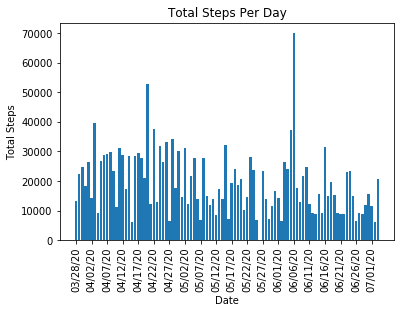

In [8]:
plt.bar(df_totalSteps['Date'],df_totalSteps['TotalSteps'])
plt.title("Total Steps Per Day")
plt.ylabel("Total Steps")
plt.xlabel("Date")
plt.xticks(np.arange(0, len(df_totalSteps), step=5))
plt.xticks(rotation=90);

Running total steps

Text(0, 0.5, 'Total Steps (Hundred thousands)')

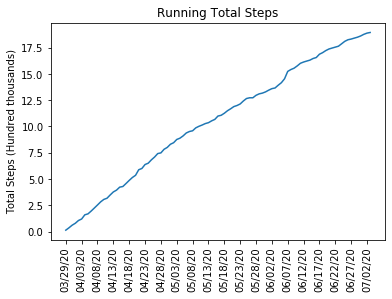

In [9]:
running_total_steps = []
running_total_steps_date = []
for i in range(len(df_totalSteps)):
    if df_totalSteps['TotalSteps'][0:i].sum() != 0:
        running_total_steps.append(df_totalSteps['TotalSteps'][0:i].sum())
        running_total_steps_date.append(df_totalSteps['Date'][i])

df_running_total_steps = pd.DataFrame({'Date':running_total_steps_date,'Running_Total_Steps':running_total_steps})

plt.plot(df_running_total_steps['Date'],(df_running_total_steps['Running_Total_Steps']/100000))
plt.title("Running Total Steps")
plt.xticks(rotation=90)
plt.xticks(np.arange(0, len(df_running_total_steps), step=5))
plt.ylabel("Total Steps (Hundred thousands)")

Create dataframe for total Miles per day

In [10]:
df_totalMiles = df.groupby('Date', as_index=False)['Miles'].sum()

df_totalMiles[95:]

,Date,Miles
95,07/01/20,4
96,07/02/20,2
97,07/03/20,7


Bar chart of total miles per day

6.79 miles on average per day


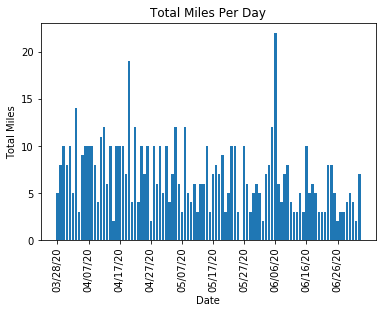

In [11]:
aveMiles = df_totalMiles['Miles'].mean()
print("{0:0.2f} miles on average per day".format(aveMiles))

plt.bar(df_totalSteps['Date'],df_totalMiles['Miles'])
plt.title("Total Miles Per Day")
plt.ylabel("Total Miles")
plt.xlabel("Date")
plt.xticks(np.arange(0, len(df_totalSteps), step=10))
plt.xticks(rotation=90);

Average Total Miles for this month

In [12]:
aveMilesMarch = df_totalMiles['Miles'][:3].mean()
print("{0:0.2f} miles on average per day for March".format(aveMilesMarch))

aveMilesApril = df_totalMiles['Miles'][4:33].mean()
print("{0:0.2f} miles on average per day for April".format(aveMilesApril))

aveMilesMay = df_totalMiles['Miles'][35:64].mean()
print("{0:0.2f} miles on average per day for May".format(aveMilesMay))

aveMilesJune = df_totalMiles['Miles'][65:94].mean()
print("{0:0.2f} miles on average per day for June".format(aveMilesJune))

aveMilesJuly = df_totalMiles['Miles'][95:].mean()
print("{0:0.2f} miles on average per day for July".format(aveMilesJuly))

7.67 miles on average per day for March
8.45 miles on average per day for April
6.31 miles on average per day for May
5.76 miles on average per day for June
4.33 miles on average per day for July


In [13]:
months = ["March","April","May","June","July"]
aveMilesPerMonth = [aveMilesMarch,aveMilesApril,aveMilesMay,aveMilesJune,aveMilesJuly]
df_monthlyAve = pd.DataFrame({'Month':months,'Miles':aveMilesPerMonth})
df_monthlyAve

,Month,Miles
0,March,7.666667
1,April,8.448276
2,May,6.310345
3,June,5.758621
4,July,4.333333


<BarContainer object of 5 artists>

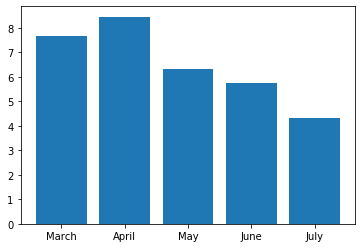

In [14]:
plt.bar(df_monthlyAve['Month'],df_monthlyAve['Miles'])

Running Total Miles

97
97


Text(0, 0.5, 'Total Miles')

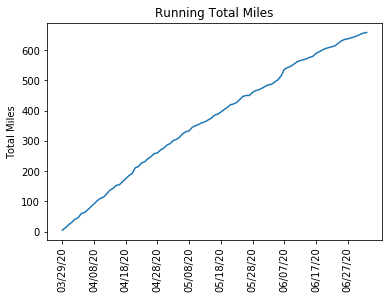

In [15]:
running_total_miles = []
running_total_miles_date = []
start = 0

for i in range(start,len(df_totalMiles)):
    if df_totalMiles['Miles'][0:i].sum() != 0:
        running_total_miles.append(df_totalMiles['Miles'][0:i].sum())
        running_total_miles_date.append(df_totalMiles['Date'][i])

print(len(running_total_miles))
print(len(running_total_miles_date))
df_running_total_miles = pd.DataFrame({'Date':running_total_miles_date,'Running_Total_Miles':running_total_miles})

plt.plot(df_running_total_miles['Date'],(df_running_total_miles['Running_Total_Miles']/1))
plt.title("Running Total Miles")
plt.xticks(rotation=90)
plt.xticks(np.arange(0, len(df_running_total_miles), step=10))
plt.ylabel("Total Miles")

Bar chart of Steps/Mile

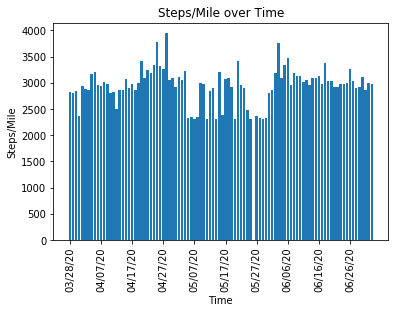

In [16]:
plt.bar(df['Date'],df['Steps/Mile'])
plt.title("Steps/Mile over Time")
plt.ylabel("Steps/Mile")
plt.xticks(np.arange(0, len(df_totalSteps), step=10), rotation=90)
plt.xlabel("Time");

Scatter plot of steps per mile

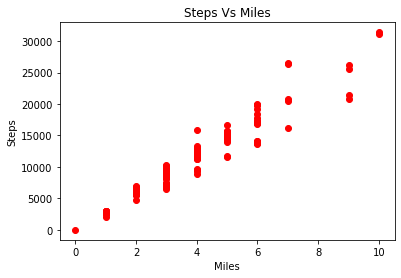

In [17]:
plt.scatter(df['Miles'],df['TotalSteps'],color='red')
plt.title("Steps Vs Miles")
plt.ylabel("Steps")
plt.xlabel("Miles");

Linear regression of steps/mile over time

In [18]:
model = LinearRegression()
train_x = np.asanyarray(df[['Miles']])
train_y = np.asanyarray(df[['TotalSteps']])
model.fit(train_x,train_y)

print('Coefficient: ', model.coef_)
print('Intercept: ', model.intercept_)

Coefficient:  [[2848.45664718]]
Intercept:  [115.82769451]


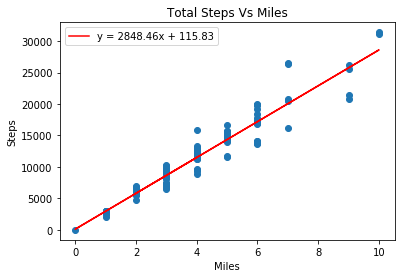

In [19]:
plt.scatter(df['Miles'],df['TotalSteps'])
plt.title("Total Steps Vs Miles")
plt.ylabel("Steps")
plt.xlabel("Miles")

coefficient = model.coef_[0][0]
intercept = model.intercept_[0]

linear_function = 'y = {0:0.2f}x + {1:0.2f}'.format(coefficient, intercept)
plt.plot(train_x, model.coef_[0][0]*train_x + model.intercept_[0], '-r', label=linear_function)
plt.legend(loc='upper left')

Model Evaluation

In [20]:
test_x = np.asanyarray(df[['Miles']])
test_y = np.asanyarray(df[['TotalSteps']])
test_y_hat = model.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat, test_y))

Mean absolute error: 955.84
Residual sum of squares (MSE): 2288964.27
R2-score: 0.92


Miles Walked Vs. Weight Loss

In [21]:
#df2 = df[0:80]
df_miles_weight = df.groupby('Date', as_index=False)[['Miles','Weight']].sum()

date = df_miles_weight['Date']
miles = df_miles_weight['Miles']
weight = df_miles_weight['Weight']

df_miles_weight

,Date,Miles,Weight
0,03/28/20,5,153.0
1,03/29/20,8,150.0
2,03/30/20,10,148.0
3,03/31/20,8,146.5
4,04/01/20,10,148.5
...,...,...,...
93,06/29/20,4,121.5
94,06/30/20,5,123.0
95,07/01/20,4,122.0
96,07/02/20,2,122.5


Line graph of weight over time

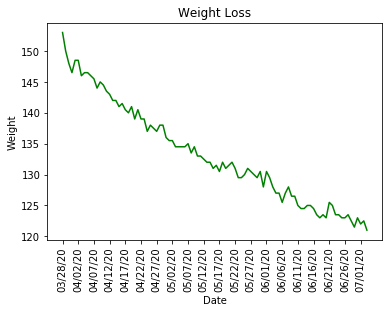

In [22]:
weightData = df_miles_weight.iloc[-1][2]
if weightData == 0.0:
    a = len(df_miles_weight)-1
else:
    a = len(df_miles_weight)
plt.plot(date[0:a],weight[0:a],'-g')
plt.title("Weight Loss")
plt.ylabel("Weight")
plt.xlabel("Date")
plt.xticks(np.arange(0, len(df_totalSteps), step=5), rotation=90);

## Linear Regression
Regression analysis on the time and weight

Will be predicting the weight after certain amount of days

Will also be predicting the days required to get to a certain amount of weight

Weight after 30 days: 138.33
Weight goal of 120 will be completed in 96 days on 2020-07-02


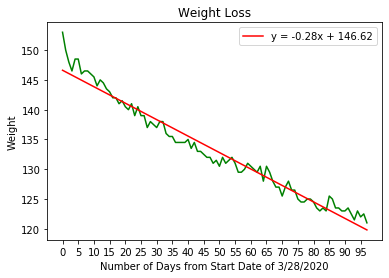

In [23]:
from sklearn.model_selection import train_test_split

weightData = df_miles_weight.iloc[-1][2]
if weightData == 0.0:
    a = len(df_miles_weight)-1
else:
    a = len(df_miles_weight)

#a = 5
model = LinearRegression()

X = np.arange(0,a,1)
X = X.reshape(a, -1)
y = df_miles_weight['Weight'][0:a]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

model.fit(X_train,y_train)

#print('Coefficient: ', model.coef_)
#print('Intercept: ', model.intercept_)

plt.plot(np.arange(0,a,1),weight[0:a],'-g')

linear_function = 'y = {0:0.2f}x + {1:0.2f}'.format(model.coef_[0], model.intercept_)
plt.plot(np.arange(0, a, 1), model.coef_[0]*np.arange(0, a, 1) + model.intercept_, '-r', label=linear_function)
plt.title("Weight Loss")
plt.ylabel("Weight")
plt.xlabel("Number of Days from Start Date of 3/28/2020")
plt.xticks(np.arange(0, a, 5.0))
plt.legend(loc='upper right');

#Predicting the weight after a certain amount of days
predTime = 30
y_pred = model.coef_[0]*predTime + model.intercept_
print("Weight after {0:0.0f} days: {1:0.2f}".format(predTime,y_pred))

#Predicting the date when the weight goal will be achieved
weight_goal = 120
x_pred = (weight_goal - model.intercept_)/(model.coef_[0])
#newDate = np.datetime64(df_miles_weight['Date'][0]) + np.timedelta64(20, 'D')
newDate = np.datetime64('2020-03-28') + np.timedelta64(int(x_pred), 'D')
print("Weight goal of {0:0.0f} will be completed in {1:0.0f} days on".format(weight_goal,x_pred),newDate)

Linear regression evaluation metrics

In [24]:
y_hat_test = model.predict(X_test)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat_test - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat_test - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_hat_test, y_test))

Mean absolute error: 1.40
Residual sum of squares (MSE): 5.14
R2-score: 0.93


Creating new dataframe with the changes in weight loss each day

In [25]:
df_loss = df.groupby('Date', as_index=False)[['Miles','Weight']].sum()

loss = [0]
for i in range(1,len(df_loss),1):
    j = i-1
    loss.append(df_loss['Weight'][i]-df_loss['Weight'][j])

df_loss['Loss'] = loss
df_loss

,Date,Miles,Weight,Loss
0,03/28/20,5,153.0,0.0
1,03/29/20,8,150.0,-3.0
2,03/30/20,10,148.0,-2.0
3,03/31/20,8,146.5,-1.5
4,04/01/20,10,148.5,2.0
...,...,...,...,...
93,06/29/20,4,121.5,-1.0
94,06/30/20,5,123.0,1.5
95,07/01/20,4,122.0,-1.0
96,07/02/20,2,122.5,0.5


Regression on miles walked vs weight loss

Coefficient:  [[2848.45664718]]
Intercept:  [115.82769451]


Text(0, 0.5, 'Weight Loss (lbs)')

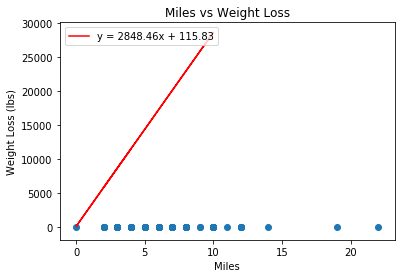

In [26]:
from sklearn.model_selection import train_test_split

X = df_loss[['Miles']]
y = df_loss[['Loss']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

model.fit(train_x,train_y)

print('Coefficient: ', model.coef_)
print('Intercept: ', model.intercept_)

coefficient = model.coef_[0][0]
intercept = model.intercept_[0]

linear_function = 'y = {0:0.2f}x + {1:0.2f}'.format(coefficient, intercept)
plt.plot(train_x, model.coef_[0][0]*train_x + model.intercept_[0], '-r', label=linear_function)
plt.legend(loc='upper left')

plt.scatter(df_loss['Miles'],df_loss['Loss'])
plt.title("Miles vs Weight Loss")
plt.xlabel("Miles")
plt.ylabel("Weight Loss (lbs)")

No clear linear relationship between the amount of miles walked and the amount of weight loss